<a href="https://colab.research.google.com/github/debanga/DeepLearningNotebooks/blob/master/Inter_epoch_checkpoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Demo for Continuing Training with Checkpoints

## Import and Data I/O

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import time

import torch
from torch.autograd import Variable
from tqdm.notebook import tqdm
import sklearn.preprocessing as pre

plt.rcParams['figure.figsize'] = [10,10]

# Import data
dataset = pd.read_csv('https://raw.githubusercontent.com/debanga/depurr/master/datasets/Iris.csv').drop(columns=['Id'])

# See a tabular sample
dataset.head()

# Get feature distribution
dataset.describe()

# Generate X and y
x_train = dataset.drop(columns=['Species'])
y_train = dataset['Species']
y_train = pd.DataFrame(pre.LabelEncoder().fit_transform(y_train))
y_train = pre.OneHotEncoder().fit_transform(y_train[[0]]).toarray()

x_train = torch.from_numpy(data_x)
y_train = torch.from_numpy(data_y)

## Utility Functions

In [0]:
def train(model, optimizer, losslogger, start_epoch, num_epoch, run_id, X, y, checkpoint_name, verbose=False):

    global_iteration = 0
    loss_function = torch.nn.MSELoss()

    t = tqdm(range(start_epoch,start_epoch+num_epoch))

    for epoch in t:
        input = Variable(X)
        target = Variable(y)

        # forward
        out = model(input)
        loss = loss_function(out, target)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # show
        t.set_description('Epoch[{}/{}], loss: {:.6f}'
            .format(epoch + 1, num_epoch, loss.data.item()))
        
        # set in logs
        df = pd.DataFrame()
        df['chackpoint_name'] = pd.Series(checkpoint_name)
        df['epoch'] = pd.Series(epoch)
        df['Loss'] = pd.Series(loss.data.item())
        df['run'] = run_id
        losslogger = losslogger.append(df)


    if verbose==True:
        # Print model's state_dict
        print("Model's state_dict:")
        for param_tensor in model.state_dict():
            print(param_tensor, "\t", model.state_dict()[param_tensor].size())

        # Print optimizer's state_dict
        print("Optimizer's state_dict:")
        for var_name in optimizer.state_dict():
            print(var_name, "\t", optimizer.state_dict()[var_name])

        # predicting
        print(model(torch.tensor([[500, 500, 500]], dtype=torch.float32)))

    state = {'epoch': epoch + 1, 'state_dict': model.state_dict(),
             'optimizer': optimizer.state_dict(), 'losslogger': losslogger, }
    torch.save(state, f'{checkpoint_name}')

def load_checkpoint(model, optimizer, losslogger, filename):
    # Note: Input model & optimizer should be pre-defined.  This routine only updates their states.
    start_epoch = 0
    if os.path.isfile(filename):
        print("=> loading checkpoint '{}'".format(filename))
        checkpoint = torch.load(filename)
        start_epoch = checkpoint['epoch']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        losslogger = checkpoint['losslogger']
        print("=> loaded checkpoint '{}' (epoch {})"
                  .format(filename, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(filename))

    return model, optimizer, start_epoch, losslogger


## First Training Loop

In [129]:
# Start
start_epoch = 0

# number of epochs
num_epoch = 100

# Logger
losslogger = pd.DataFrame()

# Model
model = torch.nn.Sequential(
    torch.nn.Linear(3,3, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(3,3, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(3,3, bias=True),
    torch.nn.ReLU(),
    torch.nn.Softmax(dim=1)
)

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)


# Checkpoint name
checkpoint_name = 'checkpoint.pth.tar'

train(model, optimizer, losslogger, start_epoch, num_epoch, 0, x_train, y_train, checkpoint_name)
time.sleep(8)

## Load and Continue Training

In [130]:
# Load and continute train // run 1
model, optimizer, start_epoch, losslogger = load_checkpoint(model, optimizer, losslogger, filename=checkpoint_name)
!rm 'checkpoint.pth.tar'
train(model, optimizer, losslogger, start_epoch, num_epoch, 1, x_train, y_train, checkpoint_name)
time.sleep(8)

# Load and continute train // run 2
model, optimizer, start_epoch, losslogger = load_checkpoint(model, optimizer, losslogger, filename=checkpoint_name)
!rm 'checkpoint.pth.tar'
train(model, optimizer, losslogger, start_epoch, num_epoch, 2, x_train, y_train, checkpoint_name)
time.sleep(8)

# Load and continute train // run 3
model, optimizer, start_epoch, losslogger = load_checkpoint(model, optimizer, losslogger, filename=checkpoint_name)
!rm 'checkpoint.pth.tar'
train(model, optimizer, losslogger, start_epoch, num_epoch, 3, x_train, y_train, checkpoint_name)
time.sleep(8)

# Load and continute train // run 4
model, optimizer, start_epoch, losslogger = load_checkpoint(model, optimizer, losslogger, filename=checkpoint_name)
!rm 'checkpoint.pth.tar'
train(model, optimizer, losslogger, start_epoch, num_epoch, 4, x_train, y_train, checkpoint_name)
time.sleep(8)


=> loading checkpoint 'checkpoint.pth.tar'
=> loaded checkpoint 'checkpoint.pth.tar' (epoch 100)



=> loading checkpoint 'checkpoint.pth.tar'
=> loaded checkpoint 'checkpoint.pth.tar' (epoch 200)



=> loading checkpoint 'checkpoint.pth.tar'
=> loaded checkpoint 'checkpoint.pth.tar' (epoch 300)



=> loading checkpoint 'checkpoint.pth.tar'
=> loaded checkpoint 'checkpoint.pth.tar' (epoch 400)


In [134]:
losslogger

,chackpoint_name,epoch,Loss,run
0,checkpoint.pth.tar,0,0.444327,0
0,checkpoint.pth.tar,1,0.444327,0
0,checkpoint.pth.tar,2,0.444326,0
0,checkpoint.pth.tar,3,0.444325,0
0,checkpoint.pth.tar,4,0.444324,0
...,...,...,...,...
0,checkpoint.pth.tar,395,0.010073,3
0,checkpoint.pth.tar,396,0.010022,3
0,checkpoint.pth.tar,397,0.009970,3
0,checkpoint.pth.tar,398,0.009919,3


## Verify Loss is Continuous Across Loading Cycles

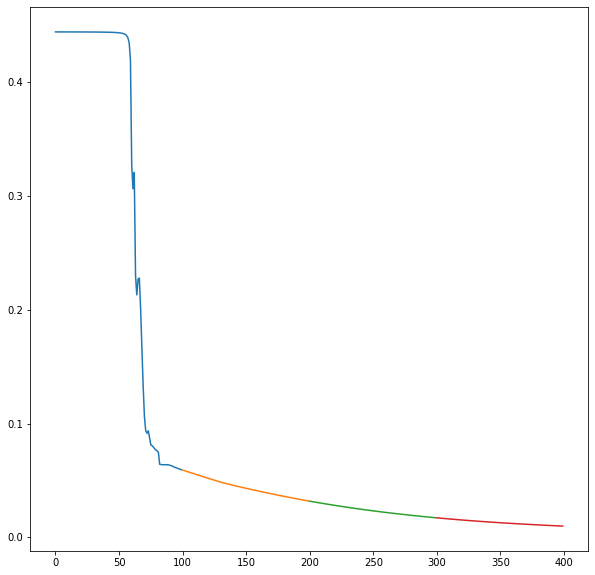

In [147]:
count = 0
for run_id in tqdm(range(len(losslogger.run.unique()))):
    df = losslogger[losslogger.run==run_id]
    n = len(df)
    plt.plot(np.arange(count,count+n),losslogger[losslogger.run==run_id].Loss.values);
    count += n
plt.show()

# References:
- https://discuss.pytorch.org/t/loading-a-saved-model-for-continue-training/17244/3
- https://medium.com/depurr/a-practical-guide-to-principal-component-analysis-pca-aa9cc5d1f13b